Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Marius-Alexandru Gurita | k12122899 | 24.01.2022, 08:00

<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 6 (Assignment)  &ndash; Convolutional neural networks </h2>

<b>Authors:</b> Brandstetter, Schäfl, Schlüter, Rumetshofer, Schörgenhumer<br>
<b>Date:</b> 10-01-2022

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

In [1]:
# Required packages and the u5_utils file
import u6_utils as u6
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
import torch

u6.check_module_versions()
# Set plotting style of seaborn related plots.
sns.set()

Installed Python version: 3.8 (✓)
Installed numpy version: 1.20.1 (✓)
Installed pandas version: 1.2.4 (✓)
Installed scikit-learn version: 0.24.1 (✓)
Installed matplotlib version: 3.3.4 (✓)
Installed seaborn version: 0.11.1 (✓)
Installed torch version: 1.10.1+cu113 (✓)
Installed tqdm version: 4.59.0 (✓)
Installed cv2 version: 4.5.5 (✓)


# Exercise 1

Similar to the Sobel filter presented in the lecture, apply two other operators (<i>Prewitt</i> and <i>Scharr</i>) to an image for the horizontal and the vertical approximations of the derivatives of the image intensity function. Perfom the following tasks:

- Load a picture of Charlie (<code>charlie_1.jpg</code>) and convert it to grayscale. Also plot the grayscale image to see what it looks like.
- Define the two Prewitt operators as numpy arrays:

\begin{equation}P_x = \left[
    \begin{array}{rrr}                                
        1 & 0 & -1 \\
        1 & 0 & -1 \\
        1 & 0 & -1 \\
    \end{array}\right]
\end{equation}

\begin{equation}P_y = \left[
    \begin{array}{rrr}                                
        1 & 1 & 1 \\
        0 & 0 & 0 \\
        -1 & -1 & -1 \\
    \end{array}\right]
\end{equation}

- Apply the two Prewitt operators to the grayscale version of Charlie and plot the result.
- Define the two Scharr operators as numpy arrays:

\begin{equation}S_x = \left[
    \begin{array}{rrr}                                
        47 & 0 & -47 \\
        162 & 0 & -162 \\
        47 & 0 & -47 \\
    \end{array}\right]
\end{equation}

\begin{equation}S_y = \left[
    \begin{array}{rrr}                                
        47 & 162 & 47 \\
        0 & 0 & 0 \\
        -47 & -162 & -47 \\
    \end{array}\right]
\end{equation}

- Apply the two operators to the grayscale version of Charlie and plot the result.

**1.1. Load the image, convert it to grayscale and plot it.**

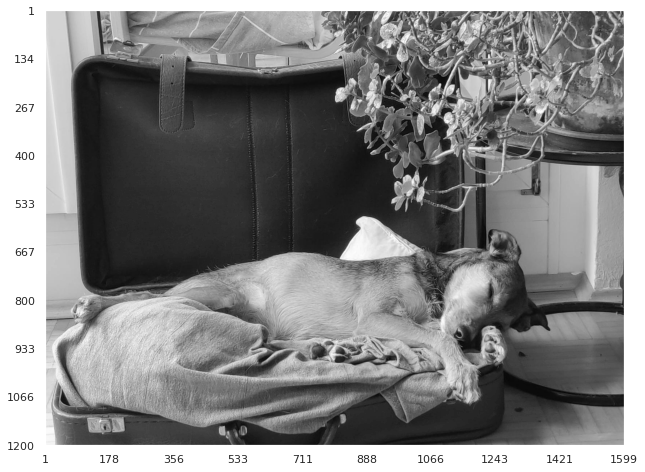

In [2]:
image = plt.imread("resources/charlie_1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
u6.show_image(image)

**1.2. Define the Prewitt operators $P_x$ and $P_y$.**

In [3]:
P_x = np.array([
    [ 1,  0,  -1],
    [ 1,  0,  -1],
    [ 1,  0,  -1]
])
P_y = np.array([
    [ 1, 1, 1],
    [ 0,  0, 0],
    [ -1, -1, -1]
])

**1.3. Apply $P_x$ and $P_y$ to the grayscale image and plot the results.**

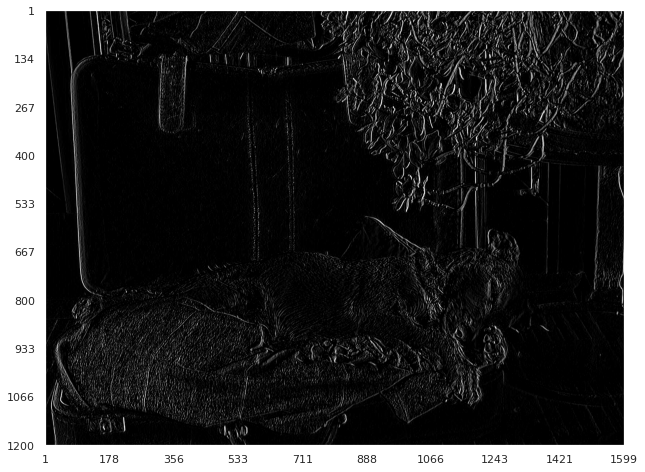

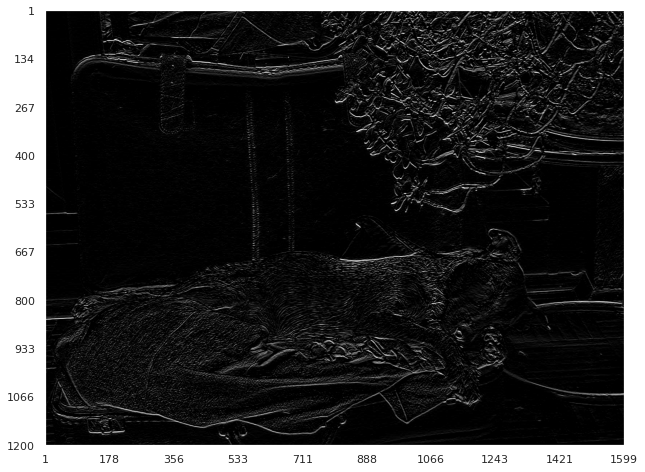

In [4]:
filtered_image = cv2.filter2D(image, -1, P_x)  # add [1:-1, 1:-1] to extract the unpadded data
u6.show_image(filtered_image)
filtered_image = cv2.filter2D(image, -1, P_y)  # add [1:-1, 1:-1] to extract the unpadded data
u6.show_image(filtered_image)

**1.4. Which parts of the resulting images above are highlighted? Do you observe any differences between the two Prewitt operators?**

In the first image the vertical edges are highlighted and in the second one the horizontal ones are highlighted.

**1.5. Define the Scharr operators $S_x$ and $S_y$.**

In [5]:
S_x = np.array([
    [ 47,  0,  -47],
    [ 162,  0,  -162],
    [ 47,  0,  -47]
])
S_y = np.array([
    [ 47, 162, 47],
    [ 0,  0, 0],
    [ -47, -162, -47]
])

**1.6. Apply $S_x$ and $S_y$ to the grayscale image and plot the results.**

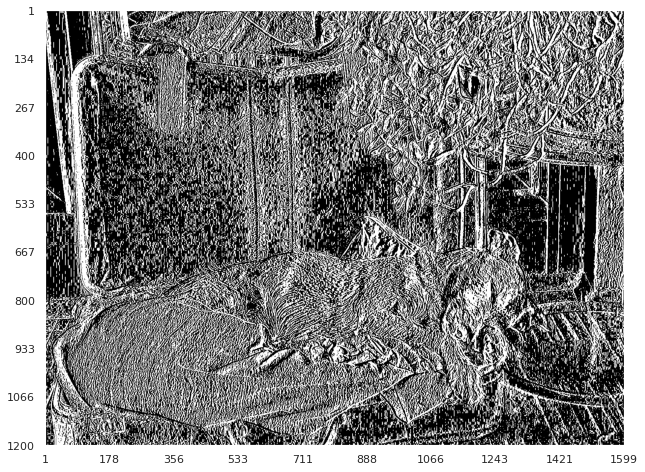

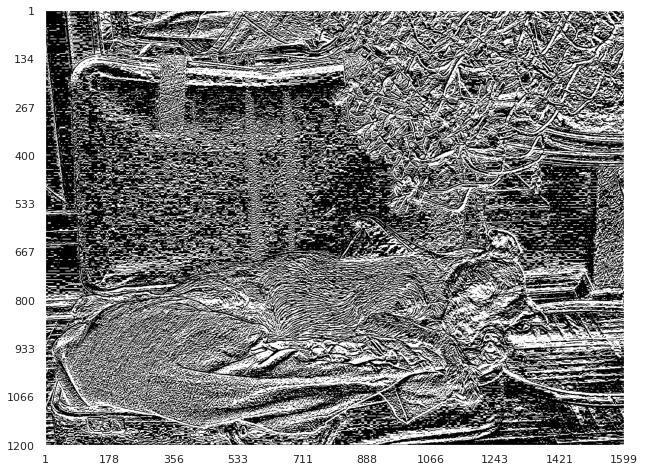

In [6]:
filtered_image = cv2.filter2D(image, -1, S_x)  # add [1:-1, 1:-1] to extract the unpadded data
u6.show_image(filtered_image)
filtered_image = cv2.filter2D(image, -1, S_y)  # add [1:-1, 1:-1] to extract the unpadded data
u6.show_image(filtered_image)

**1.7. Which parts of the resulting images above are highlighted? Do you observe any differences between the two Scharr operators?**

In the first image the vertical edges are highlighted, but in the second one the horizontal ones are highlighted.

**1.8. Do you observe any differences between the Prewitt and the Scharr operators?**

The Scarr operator uses way more white than the Prewitt operator. The edges are more visible in the Prewitt image.


# Exercise 2

Up until now, custom filters were defined and applied on images, but as you certainly noticed, no neural network was involed so far. The gist of this exercise is to change that and get more insight into how <i>convolutional neural networks</i> operate. For this reason, perform the following tasks:
    
- Define the custom filter as a numpy array:

\begin{equation}F_c = \left[
    \begin{array}{rrrrr}                                
        -1 & -0.5 & 0 & 0.5 & 1 \\
        -1 & -0.5 & 0 & 0.5 & 1 \\
        -1 & -0.5 & 0 & 0.5 & 1 \\
        -1 & -0.5 & 0 & 0.5 & 1 \\
        -1 & -0.5 & 0 & 0.5 & 1
    \end{array}\right]
\end{equation}

- Create three additional copies of the custom filter and apply the same transformations as discussed during the lecture (negate, transpose, negate + transpose).
- Visualize all four filters.

**Note**: Your final array of filters should be of the form $\left[F_c, -F_c, F_c^T, -F_c^T\right]$.

- Create and initialize a neural network of type <code>InitializedNet</code> using the four filters. Define a leaky ReLU activation function (<code>torch.nn.LeakyReLU</code> with `negative_slope=0.2`). Below you see a plot how the leaky ReLU function with our setting looks like.
- Apply the neural network to the grayscale version of Charlie. In contrast to the previous tasks, use <code>get_grayscale_image_tensor</code> to load Charlie (again, <code>charlie_1.jpg</code>).
- Compare the intermediate steps of the network by plotting the result of the convolutional layer and the activation layer.

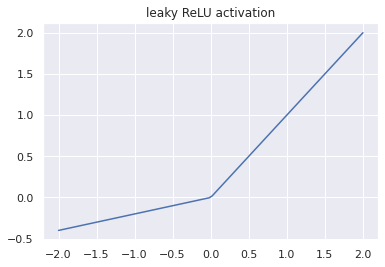

In [7]:
x = torch.tensor(np.linspace(-2, 2, 100))
sns.lineplot(x=x, y=torch.nn.LeakyReLU(negative_slope=0.2)(x))
plt.title("leaky ReLU activation");

**2.1. Define the four filters and plot them.**

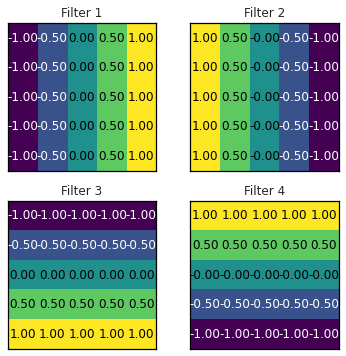

In [8]:
filter_1 = np.array([
    [-1, -0.5, 0, 0.5, 1],
    [-1, -0.5, 0, 0.5, 1],
    [-1, -0.5, 0, 0.5, 1],
    [-1, -0.5, 0, 0.5, 1],
    [-1, -0.5, 0, 0.5, 1]
])
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1,filter_2,filter_3,filter_4])
u6.visualize_filters(filters)


**2.2. Which structures do you think these filters might detect?**

**2.3. Create a model using `u6.InitializedNet` with the above filters and the leaky RelU as activation function.**

In [9]:
model = u6.InitializedNet(weights=filters, activation=torch.nn.LeakyReLU(negative_slope = 0.2))


**2.4. Get the grayscale image as tensor and use it as input for the above model to retrieve the layer outputs.**

In [10]:
image = plt.imread("resources/charlie_1.jpg")
image_tensor = u6.get_grayscale_image_tensor(image)
conv_layer, activated_layer,  _  = model(image_tensor)


**2.5. Plot the output of the convolutional layer and the output of the activation layer.**

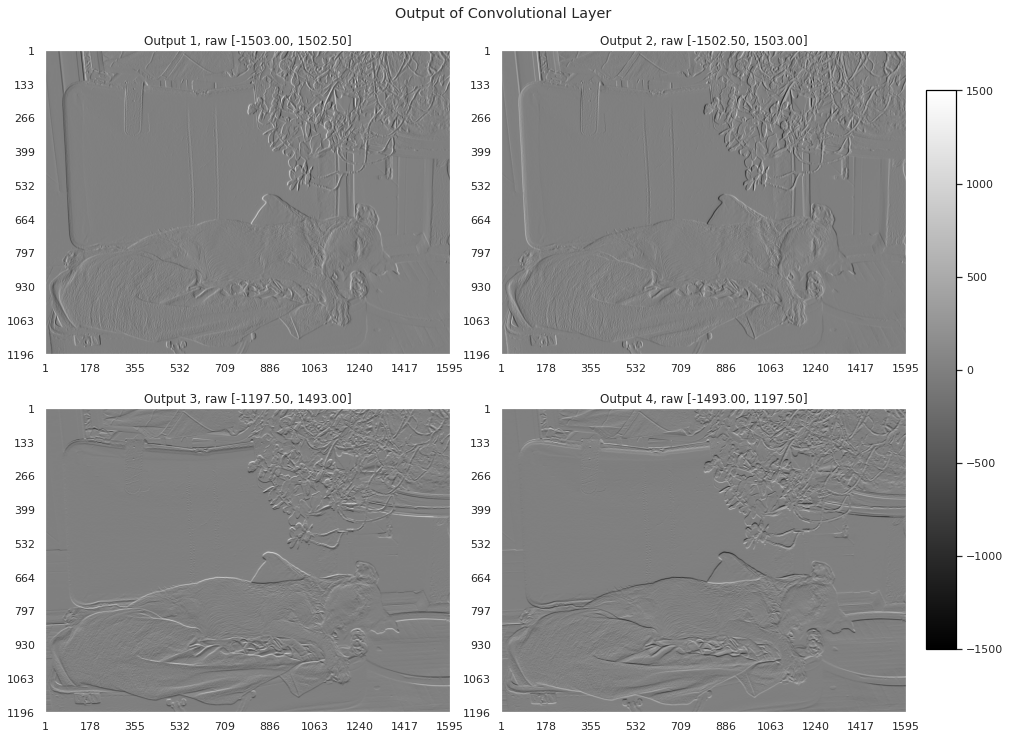

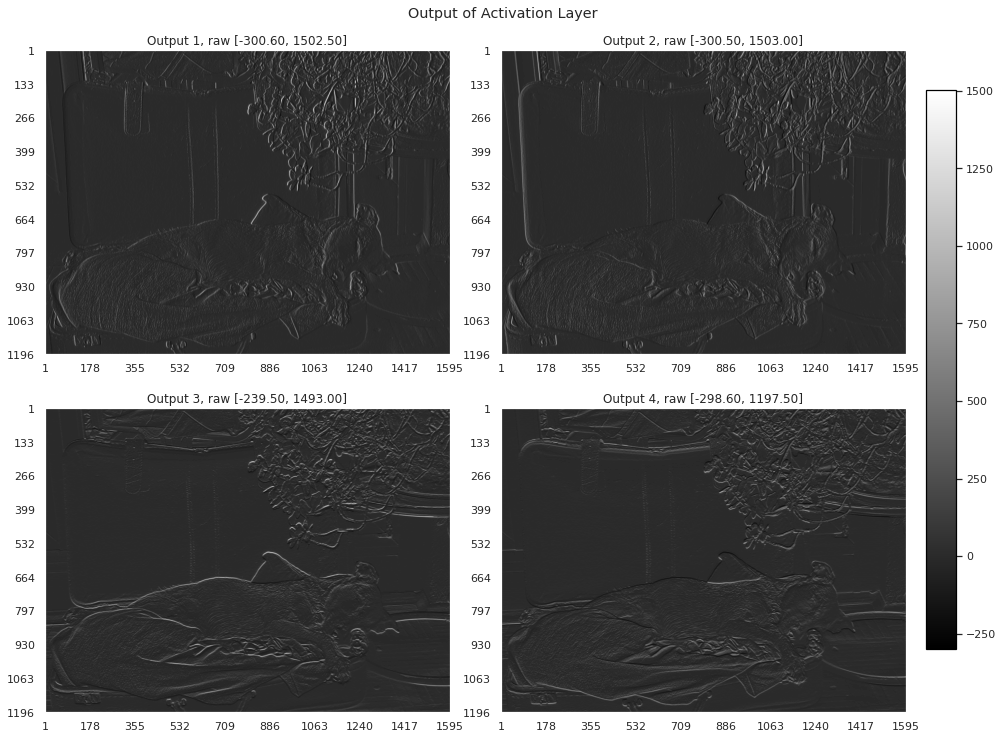

In [11]:
u6.visualize_cnn_layer(conv_layer, title="Output of Convolutional Layer")
u6.visualize_cnn_layer(activated_layer, title="Output of Activation Layer")

**2.6. Which parts of the image are highlighted? Do you observe any differences between the filters (with respect to each other) as well as between the two layers?**

    It all depends on the filter, the zones where the filter is -1, the edges from the picture seem like thet are inside, when the filter is -0.5 is the same, but not as much, when is 0, the edges are just a little bit contured, when the filter is 1, the edges are highlited in such a way that they seem they are on the picture, same for the 0.5, but not as much. They images are different because the filter values change by the permutation in the matrix(- / T / -T)
    The difference between the layers is that on the second one is applied a black collor and a white one on the edges to make them more visible.

# Exercise 3

In this exercise, we want to compare the output of a max pooling layer with the output of a strided convolution. Perform the following steps: 

- Create and initialize four neural networks of type <code>InitializedNet</code> using the four filters from exercise 2. Define a ReLU activation function. Additionally, configure the following hyperparameters:
    -  Model 1: <i>max pooling</i> (parameter `max_pool_size`) with height/width = $3$, don't define a stride value. 
    -  Model 2: <i>stride</i> (parameter `filter_stride`) = $3$, don't define a max pooling size.
    -  Model 3: <i>max pooling</i> with height/width = $7$, don't define a stride value.
    -  Model 4: <i>stride</i> = $7$, don't define a max pooling size.
- Apply the neural networks to the grayscale version of Charlie. Use <code>get_grayscale_image_tensor</code> to load Charlie (again, <code>charlie_1.jpg</code>).
- Compare the effect of max pooling and striding by plotting the result of the max pooling layer of model 1 and 3, and the activation layer of model 2 and 4.

**3.1. Create the four models using `u6.InitializedNet`.**

In [12]:
model1 = u6.InitializedNet(weights=filters,activation=torch.nn.ReLU(), max_pool_size=(3, 3))
model2 = u6.InitializedNet(weights=filters,activation=torch.nn.ReLU(), filter_stride=3)
model3 = u6.InitializedNet(weights=filters,activation=torch.nn.ReLU(), max_pool_size=(7, 7))
model4 = u6.InitializedNet(weights=filters,activation=torch.nn.ReLU(), filter_stride=7)


**3.2. Get the grayscale image as tensor and use it as input for the above models to retrieve the layer outputs.**

In [13]:
image = plt.imread("resources/charlie_1.jpg")
image_tensor = u6.get_grayscale_image_tensor(image)
conv_layer1, activated_layer2, pooling_layer1 = model1(image_tensor)
conv_layer2, activated_layer2, _ = model2(image_tensor)
conv_layer3, activated_layer3, pooling_layer3 = model3(image_tensor)
conv_layer4, activated_layer4, _ = model4(image_tensor)


**3.3. Kernel size 3 comparison: Plot the output of the max pooling layer of model 1 and the output of the activation layer of model 2.**

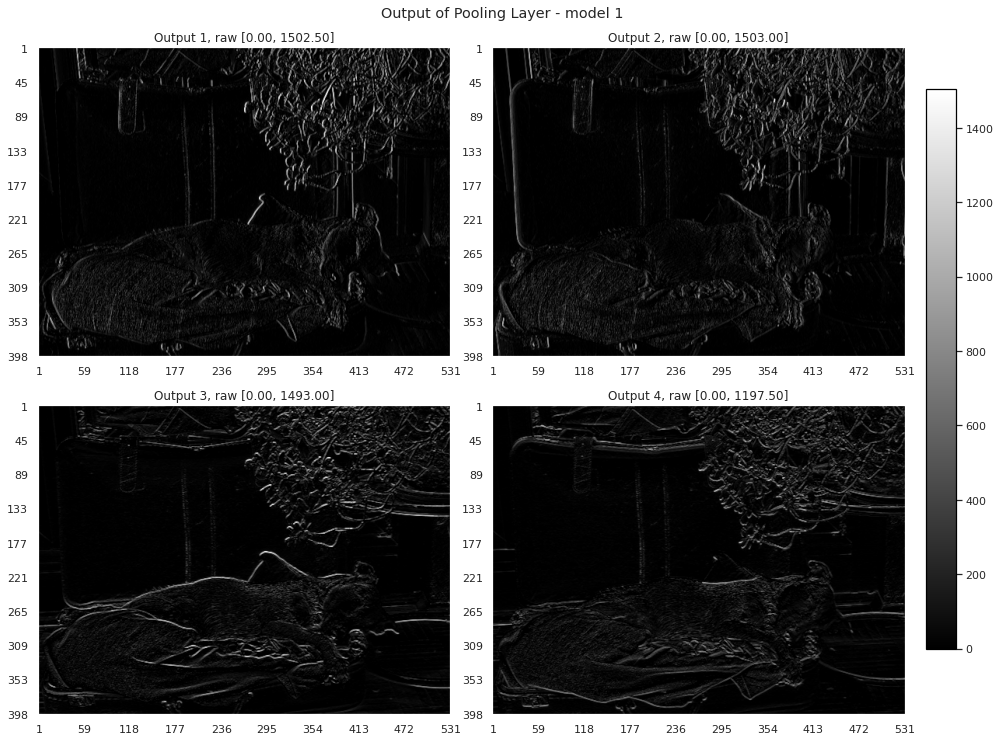

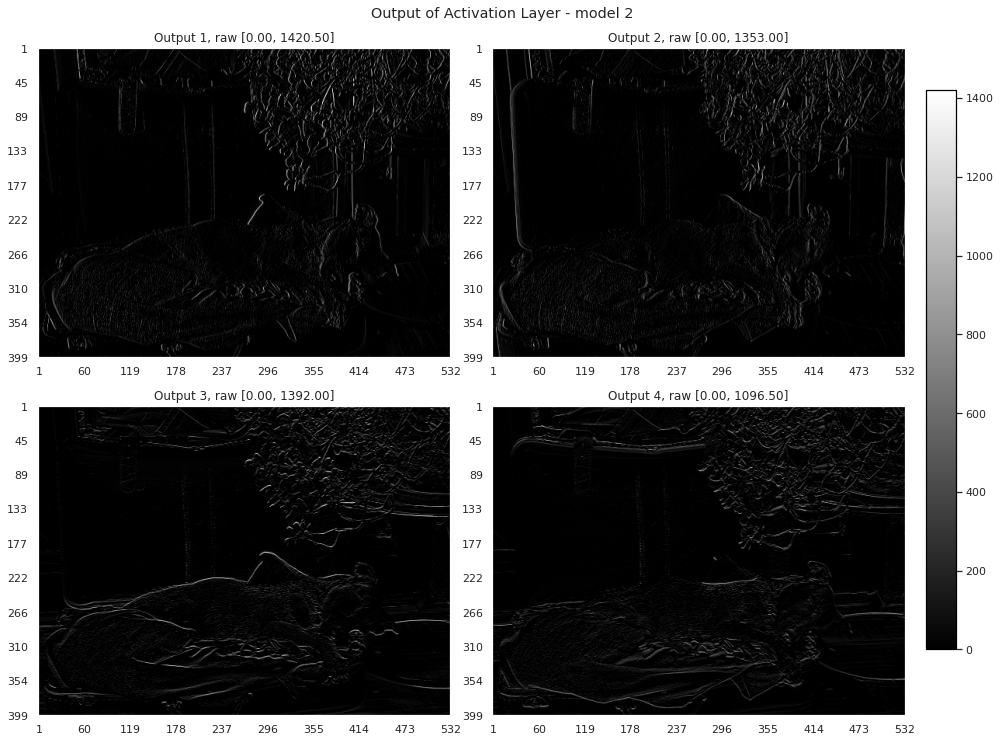

In [14]:
u6.visualize_cnn_layer(pooling_layer1, title="Output of Pooling Layer - model 1")
u6.visualize_cnn_layer(activated_layer2, title="Output of Activation Layer - model 2")

**3.4. Kernel size 7 comparison: Plot the output of the max pooling layer of model 3 and the output of the activation layer of model 4.**

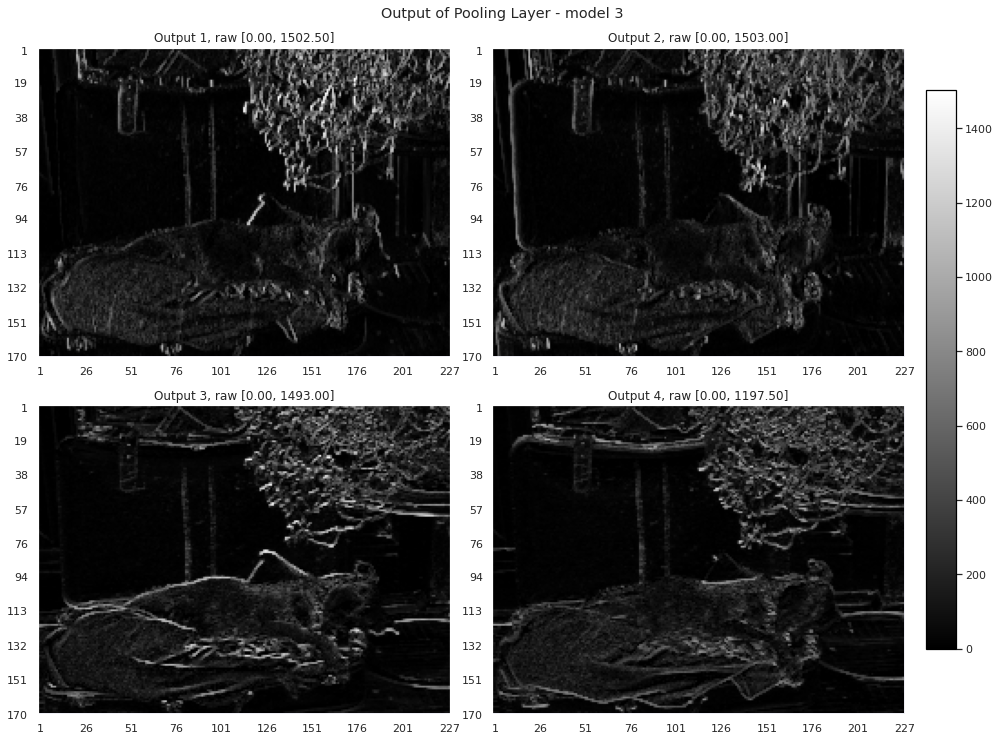

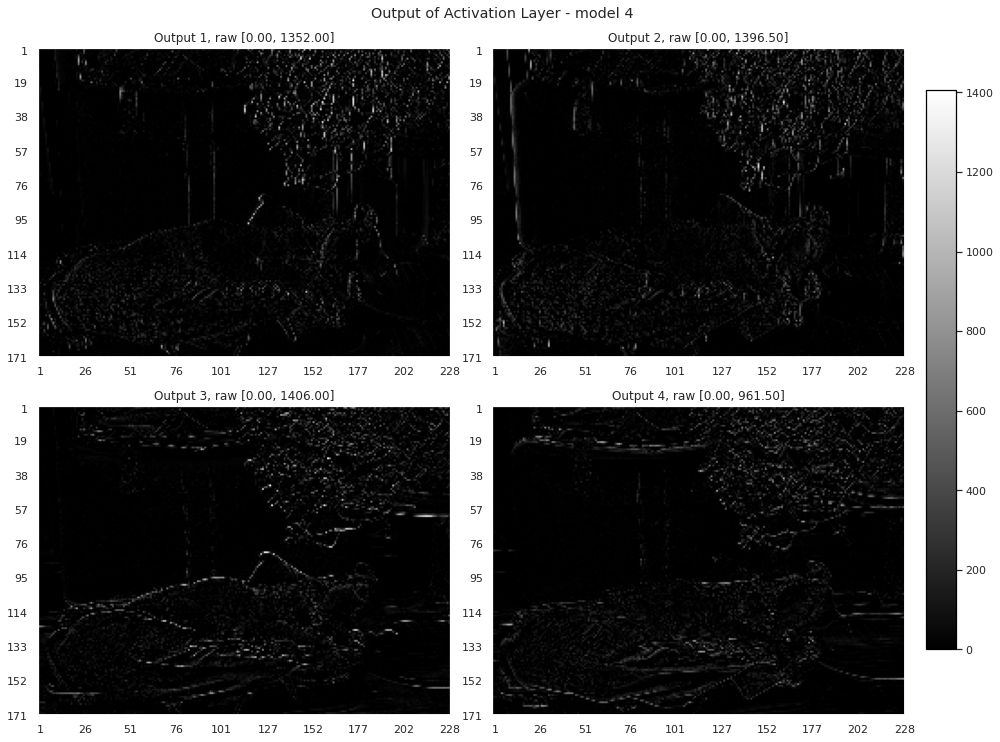

In [15]:
u6.visualize_cnn_layer(pooling_layer3, title="Output of Pooling Layer - model 3")
u6.visualize_cnn_layer(activated_layer4, title="Output of Activation Layer - model 4")

**3.5. Which parts of the image are highlighted? Do you observe any differences between striding and max pooling? Do you observe any differences between the two pooling sizes and the two stride values?**

All the edges are highlighted. The biggest difference between striding and max-pooling is that they use a little too much white on the edges, the stride one highlights only the important ones, the max-pooling one highlights all of them. When the kernel is 7 the images become too distortet.

# Exercise 4

As you are now an expert in defining and applying custom kernels, we will now move on to learning kernels to create more expressive systems. 

Following the instruction given in the lecture notebook, perform the tasks below, but this time, using the <b>CIFAR10</b> dataset (more information about the dataset can be found here: https://www.cs.toronto.edu/~kriz/cifar.html).

To load the CIFAR10 dataset and take a look at a preview of $10$ samples, run the cell below. The CIFAR10 dataset contains RGB images with a resolution of $32 \times 32$ pixels from $10$ different classes. 

**Note**: The first time you run this, it will download the dataset. You may see a <code>UserWarning: The given NumPy array is not writeable</code>. This can be safely ignored. The download itself might take a couple of minutes

- Create and train a model according to the MNIST example provided in the notebook from the lecture. Keep the structure (ordering and number of layers) and hyperparameters if not stated otherwise. Change the model in a way that:
    - it can process the RGB images from the CIFAR10 dataset as input
    - its convolutional layer applies kernels with size $5$ and outputs $16$ feature maps
    - max pooling applies kernels with size $2$
    - the number of inputs of the linear layer is adapted correctly after flattening the feature maps
    - its first fully connected layer consists of $128$ neurons
- Reload the dataset with a batch size of $20$ and considering $10\%$ of the samples as validation set. Then, train the model with the following hyperparameters: iterations = $5$; momentum = $0.7$; and learning rate = $0.01$. Use the function <code>run_gradient_descent()</code> from <code>u6_utils.py</code>.

**Note**: For reproducibility, set a fixed seed (seed=23). It will need to be set both before defining the model and before the optimization (which includes grabbing samples from the dataset). Otherwise, changes in the model would change the train/validation split samples, since both draw random numbers.

- Plot the training and validation losses and print the accuracy on the test set.
- Visualize the filters from the convolutional layer. 

Files already downloaded and verified
Files already downloaded and verified


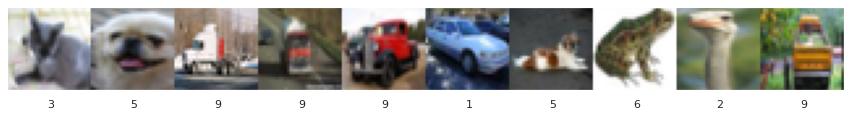

In [16]:
# load the dataset with custom batch size
train_loader, valid_loader, test_loader = u6.get_dataset(
    variant="CIFAR10",
    root="resources",
    batch_size=10,
    valid_size=0.1
)

# load the first batch of data (set seed for reproducibility)
u6.set_seed(23)
images, labels = next(iter(train_loader))
# transform the image shapes and normalize their values ([0, 1]) for visualization purposes
images = np.concatenate([img.squeeze() for img in images], axis=2).transpose(1, 2, 0)
images = (images - images.min()) / (images.max() - images.min())

# display the first batch of data
with plt.style.context({"axes.grid": False, "xtick.bottom": False}):
    plt.figure(figsize=(15, 2))
    plt.imshow(images)
    plt.xticks(16 + np.arange(len(labels)) * 32, labels.numpy())
    plt.yticks([])

**4.1. Reload the dataset with $10\%$ validation data.**

In [17]:
train_loader, valid_loader, test_loader = u6.get_dataset(
    variant="CIFAR10",
    root="resources",
    batch_size=20,
    valid_size=0.1
)


Files already downloaded and verified
Files already downloaded and verified


**4.2. Define the model (set seed before). Define the loss function. Run the optimization (set seed before).**

In [18]:
u6.set_seed(23)

model = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5),  # conv layer: size changes from (1, 28, 28) to (10, 24, 24)
    torch.nn.ReLU(),                                                 # nonlinearity
    torch.nn.MaxPool2d(kernel_size=2),                               # max pooling layer: size changes from (10, 24, 24) to (10, 6, 6)
    torch.nn.Flatten(),                                              # flatten activation maps: size changes from (10, 6, 6) to 1D shape of size (10 * 6 * 6)
    torch.nn.Linear(16 *14 *14, 128),                                # first fully connected layer
    torch.nn.ReLU(),                                                 # nonlinearity
    torch.nn.Linear(128, 10)                                         # output layer
)
loss = torch.nn.functional.cross_entropy

u6.set_seed(23)
losses = u6.run_gradient_descent(
    model=model,
    loss=loss,
    training_set=train_loader,
    valid_set=valid_loader,
    iterations=5,
    learning_rate=0.01,
    momentum=0.7,
    use_cuda_if_available=True
)

  0%|          | 0/45000 [00:00<?, ?it/s]

Epoch 1 finished with training loss: 1.568454285701116
Epoch 2 finished with training loss: 1.2661169637839
Epoch 3 finished with training loss: 1.094758492787679
Epoch 4 finished with training loss: 0.9707832291523616
Epoch 5 finished with training loss: 0.8598262842562464


**4.3. Plot the training and validation losses and print the accuracy on the test set.**

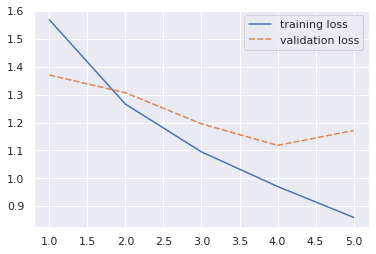

Test set:
{'loss': 1.1860632264614106, 'accuracy': 0.6086000011563301}


In [19]:
sns.lineplot(data=losses)
plt.show()

print("Test set:")
print(u6.evaluate_model(model, test_loader, loss=loss, accuracy=u6.multiclass_accuracy))

**4.4. Plot the filters from the convolutional layer (layer 0).**

Sequential(
  (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Flatten(start_dim=1, end_dim=-1)
  (4): Linear(in_features=3136, out_features=128, bias=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=10, bias=True)
)


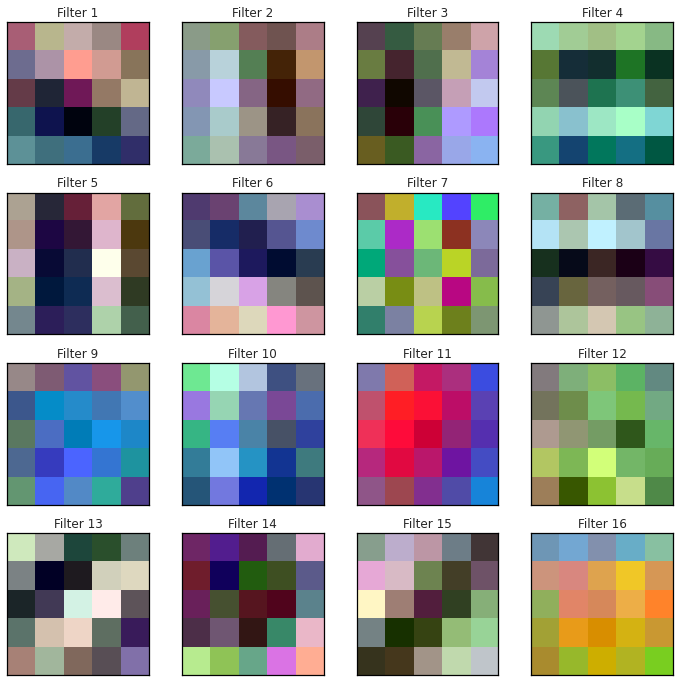

In [20]:
print(model)
u6.visualize_cnn_filters(model[0], ncols=4)

**4.5. What kind of different structures (or textures) in an image might your CNN detect with these filters?**

I think that the CNN might detect vertical/horizontal edges and big differences between collors.

# Exercise 5

- Load the CIFAR10 dataset considering $10\%$ of the samples as validation set.
- Create a model similar to the model from exercise 4. Your model should contain at least three convolutional layers (don't forget the nonlinearities), the remaining architecture design is up to you.
- Train the model by using the function <code>run_gradient_descent()</code> from <code>u6_utils.py</code> and choose some appropriate hyperparameters.

**Note**: For reproducibility, set a fixed seed (seed=23). It will need to be set both before defining the model and before the optimization (which includes grabbing samples from the dataset). Otherwise, changes in the model would change the train/validation split samples, since both draw random numbers.

- Can you optimize the model in order to achieve an accuracy on the test set > $70\%$? Plot the training and validation losses to show that your model does not overfit to the training data and print out the accuracy on test to show that it is better than $70\%$.

**Note**: For optimization, you can vary several hyperparameters, e.g.: batch size, iterations, learning rate, momentum, number of layers, number of kernels/neurons, and type of nonlinearity. Also different types of layers are allowed, e.g., [<code>torch.nn.Dropout()</code>](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html). You may also try randomly flipping training images to perform data augmentation (provided by <code>u6.get_dataset()</code>). Do not vary the validation set size, as that would change the training set size.

**5.1. Reload the dataset with $10\%$ validation data (choice of other parameters is up to you).**

In [21]:
train_loader, valid_loader, test_loader = u6.get_dataset(
    variant="CIFAR10",
    root="resources",
    batch_size=34,
    valid_size=0.1
)

Files already downloaded and verified
Files already downloaded and verified


**5.2. Define the model (set seed before). Define the loss function. Run the optimization (set seed before).**

In [22]:
# Define the model (set seed for reproducibility)
u6.set_seed(seed=23)
model = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=3, out_channels=15, kernel_size=3), #(3,32,32)--(15,30,30) 
    torch.nn.ReLU(),
    
    torch.nn.Conv2d(in_channels=15, out_channels=45, kernel_size=3), #(15,30,30)--(45,28,28)
    torch.nn.ReLU(), 
    torch.nn.MaxPool2d(kernel_size=2),#(24,28,28)--(24,14,14)                            

    torch.nn.Conv2d(in_channels=45, out_channels=60, kernel_size=3), #(45,14,14)--(60,12,12)
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=4),#(60,12,12)--(60,3,3)                            
    torch.nn.ReLU(),                                                

    torch.nn.Flatten(),
    torch.nn.Linear(60*3*3, 300),
    torch.nn.ReLU(),
    torch.nn.Linear(300, 10),
)

# Define the loss function
loss = torch.nn.functional.cross_entropy

# Minimize the given loss for our CNN model (set seed for reproducibility)
u6.set_seed(seed=23)
losses = u6.run_gradient_descent(
    model=model,
    loss=loss,
    training_set=train_loader,
    valid_set=valid_loader,
    iterations=7,
    learning_rate=0.01,
    momentum=0.7,
    use_cuda_if_available=True
)

  0%|          | 0/45000 [00:00<?, ?it/s]

Epoch 1 finished with training loss: 1.7692265949940753
Epoch 2 finished with training loss: 1.3234558086110746
Epoch 3 finished with training loss: 1.1117912780752355
Epoch 4 finished with training loss: 0.9746313883818889
Epoch 5 finished with training loss: 0.8596688886468504
Epoch 6 finished with training loss: 0.7690584602627869
Epoch 7 finished with training loss: 0.6942505812852044



**5.3. Optimize the model in order to achieve an accuracy on the test set > $70\%$. Plot the training and validation losses and print the accuracy on the test set.**

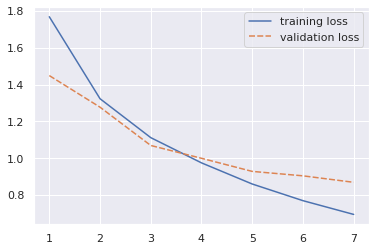

Test set:
{'loss': 0.8889937838255348, 'accuracy': 0.7030408798638037}


In [23]:
sns.lineplot(data=losses)
plt.show()
print("Test set:")
print(u6.evaluate_model(model, test_loader, loss=loss, accuracy=u6.multiclass_accuracy))